# Proyek Predictive Analytics : HealthCare Diabetes

- Nama: Usamah Putra Firdaus
- Email: usamahfirdaa@gmail.com
- ID Dicoding: Usamah Putra Firdaus

In [1]:
!pip install kaggle

# **A. Import Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# **B. Data Load**

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usamahptrf","key":"7e847dbc902f58fd5ed63790fa3460f5"}'}

In [4]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d nanditapore/healthcare-diabetes
!unzip healthcare-diabetes.zip

Dataset URL: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes
License(s): apache-2.0
Archive:  healthcare-diabetes.zip
  inflating: Healthcare-Diabetes.csv  


In [6]:
df = pd.read_csv('Healthcare-Diabetes.csv')
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


# C. Exploratory Data Analysis (EDA)

## Data Understanding

1. Id
→ Nomor unik untuk mengidentifikasi setiap baris data.

2. Pregnancies
→ Jumlah kehamilan yang pernah dialami oleh pasien (bisa memengaruhi risiko diabetes gestasional).

3. Glucose
→ Kadar glukosa (gula darah) dalam plasma selama 2 jam setelah tes toleransi glukosa oral; indikator penting dalam diagnosis diabetes.

4. BloodPressure
→ Tekanan darah diastolik (tekanan saat jantung berelaksasi), diukur dalam mmHg; tekanan darah tinggi dapat berkaitan dengan risiko diabetes.

5. SkinThickness
→ Ketebalan lipatan kulit triseps dalam mm; digunakan untuk memperkirakan jumlah lemak tubuh.

6. Insulin
→ Kadar insulin dalam darah dua jam setelah makan, diukur dalam mikro unit per mililiter (mu U/ml); membantu menilai fungsi pankreas.

7. BMI (Body Mass Index)
→ Indeks massa tubuh (berat dalam kg dibagi tinggi dalam meter kuadrat); menunjukkan apakah seseorang memiliki berat badan ideal atau obesitas.

8. DiabetesPedigreeFunction
→ Skor yang menunjukkan kemungkinan diabetes berdasarkan riwayat genetik keluarga; semakin tinggi nilainya, semakin besar risiko diabetes secara genetik.

9. Age
→ Usia pasien dalam tahun; risiko diabetes meningkat seiring bertambahnya usia.

10. Outcome
→ Label target/binary output:

- 0 berarti tidak menderita diabetes

- 1 berarti menderita diabetes

## Data Basic Information

In [7]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [10]:
df.shape

(2768, 10)

In [11]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


## Checking Missing Value & Duplicate

In [12]:
df.isna().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
print('Jumlah Data terduplikasi: ', df.duplicated().sum())

Jumlah Data terduplikasi:  0


Dari hasil pengecekan data, data sudah bersih dari nilai null dan data duplikat.

## Visualization

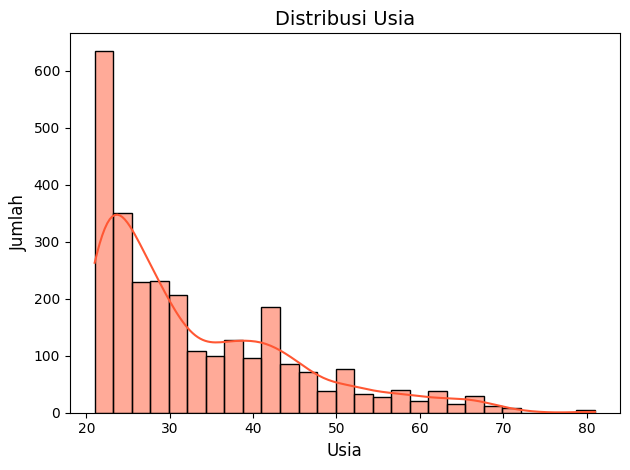

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color
custom_color = "#FF5733"  # Example color

# Plot the histogram with KDE
sns.histplot(df['Age'], kde=True, color=custom_color)

# Tambahkan judul dan label sumbu
plt.title('Distribusi Usia', fontsize=14)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.tight_layout()
plt.show()


- Dataset ini didominasi oleh orang-orang berusia muda, terutama awal 20-an.
- cukup sedikit orang yang berusia di atas 60 tahun.

<ipython-input-15-93884450adbc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=age_distribution, x='AgeGroup', y='JumlahOrang', palette='viridis')


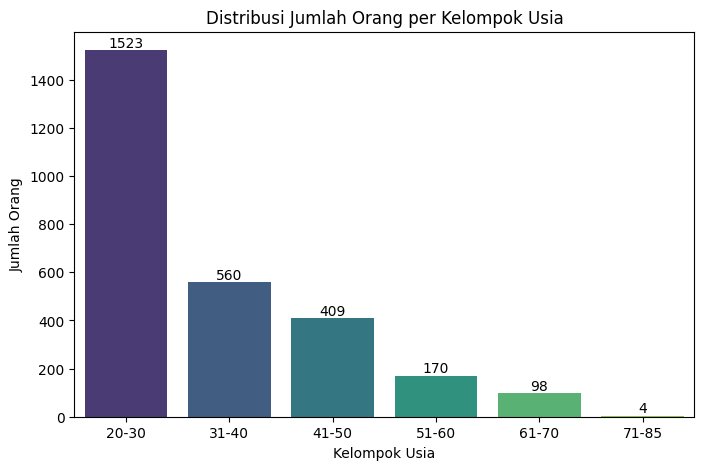

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat kategori umur
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-85']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Hitung jumlah orang per kelompok umur
age_distribution = df['AgeGroup'].value_counts(sort=False).reset_index()
age_distribution.columns = ['AgeGroup', 'JumlahOrang']

# Visualisasikan
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=age_distribution, x='AgeGroup', y='JumlahOrang', palette='viridis')
plt.title('Distribusi Jumlah Orang per Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Orang')

# Tambahkan label angka di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Hapus kolom AgeGroup jika tidak dibutuhkan
df.drop(columns='AgeGroup', inplace=True)


- Kelompok usia muda (20–30) adalah mayoritas populasi.
- Populasi mengecil seiring bertambahnya usia, terutama di atas 50 tahun.

<ipython-input-16-acc5413ce135>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Outcome', y='Jumlah', data=outcome_df, palette='Set2')


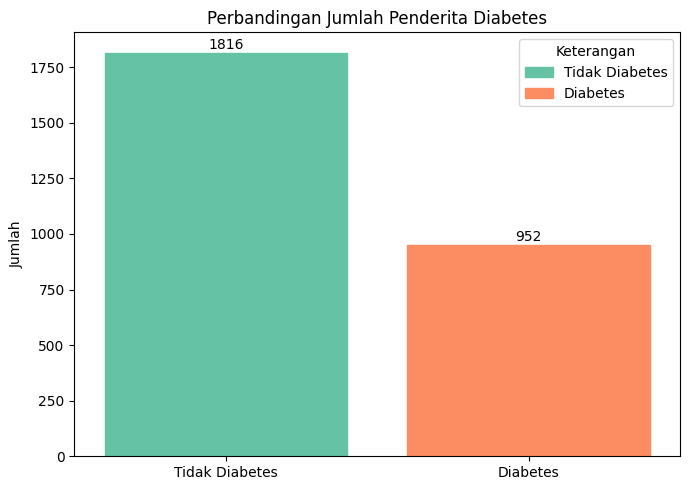

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Hitung jumlah masing-masing Outcome
outcome_counts = df['Outcome'].value_counts().sort_index()

# Buat dataframe untuk memudahkan plot dengan label
outcome_df = pd.DataFrame({
    'Outcome': ['Tidak Diabetes', 'Diabetes'],
    'Jumlah': [outcome_counts[0], outcome_counts[1]]
})

# Buat bar chart
plt.figure(figsize=(7, 5))
bar = sns.barplot(x='Outcome', y='Jumlah', data=outcome_df, palette='Set2')

# Tambahkan label di atas bar
for i, value in enumerate(outcome_df['Jumlah']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

colors = ['#66c2a5', '#fc8d62']
for bar_, color in zip(bar.patches, colors):
    bar_.set_color(color)

# Buat legend
plt.legend(handles=bar.patches, labels=['Tidak Diabetes', 'Diabetes'], title='Keterangan')

plt.title('Perbandingan Jumlah Penderita Diabetes')
plt.xlabel('')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


- Mayoritas orang dalam dataset tidak menderita diabetes.
- Namun, sekitar 1 dari 3 orang ternyata menderita diabetes, yang masih cukup signifikan secara proporsi.

<ipython-input-17-97682a3f60db>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, ax=axes[0], palette="Blues")
<ipython-input-17-97682a3f60db>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom5.index, y=bottom5.values, ax=axes[1], palette="Reds")


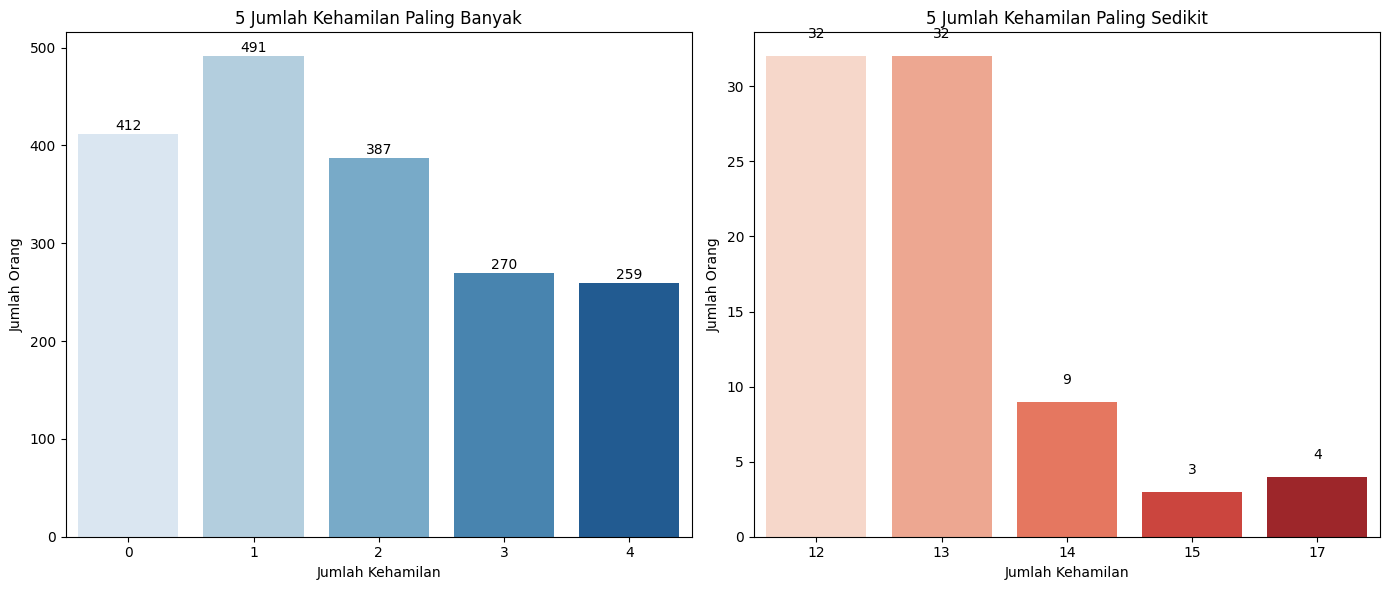

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung frekuensi jumlah kehamilan
pregnancy_counts = df['Pregnancies'].value_counts()

# Ambil 5 terbanyak dan 5 tersedikit
top5 = pregnancy_counts.nlargest(5).sort_index()
bottom5 = pregnancy_counts.nsmallest(5).sort_index()

# Buat 2 plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 5 terbanyak
sns.barplot(x=top5.index, y=top5.values, ax=axes[0], palette="Blues")
axes[0].set_title('5 Jumlah Kehamilan Paling Banyak')
axes[0].set_xlabel('Jumlah Kehamilan')
axes[0].set_ylabel('Jumlah Orang')

# Tambahkan label ke bar terbanyak
for i, value in enumerate(top5.values):
    axes[0].text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

# Plot 5 tersedikit
sns.barplot(x=bottom5.index, y=bottom5.values, ax=axes[1], palette="Reds")
axes[1].set_title('5 Jumlah Kehamilan Paling Sedikit')
axes[1].set_xlabel('Jumlah Kehamilan')
axes[1].set_ylabel('Jumlah Orang')

# Tambahkan label ke bar tersedikit
for i, value in enumerate(bottom5.values):
    axes[1].text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


- Distribusi jumlah kehamilan condong ke angka kecil: Mayoritas orang memiliki kehamilan 0–4 kali.
- Jumlah kehamilan lebih dari 10 berpotensi sebagai outlier

<ipython-input-18-1c663705f777>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=age_pregnancy, x='AgeGroup', y='Pregnancies', palette='Blues')


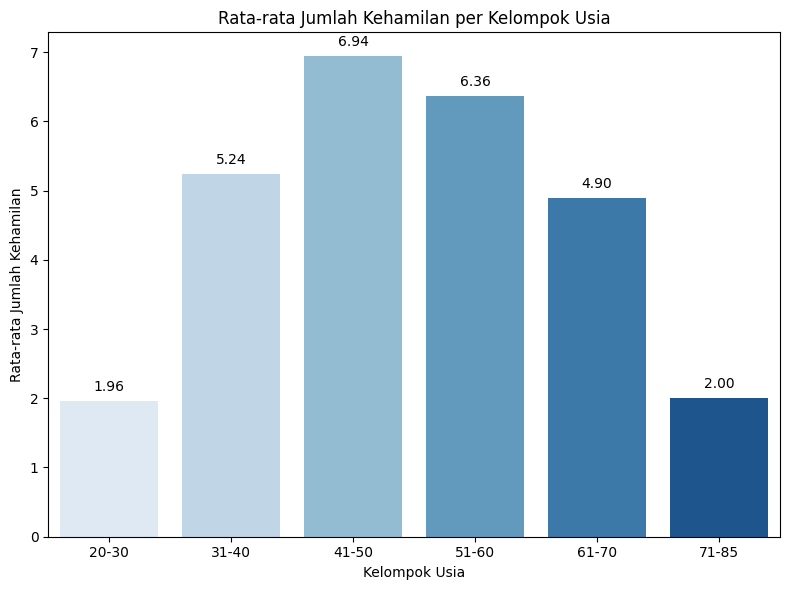

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat kategori Usia
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-85']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Hitung rata-rata jumlah kehamilan per kelompok Usia
age_pregnancy = df.groupby('AgeGroup', observed=True)['Pregnancies'].mean().reset_index()

# Visualisasikan
plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=age_pregnancy, x='AgeGroup', y='Pregnancies', palette='Blues')
plt.title('Rata-rata Jumlah Kehamilan per Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-rata Jumlah Kehamilan')

# Tambahkan label di atas bar
for i, value in enumerate(age_pregnancy['Pregnancies']):
    plt.text(i, value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Hapus kolom AgeGroup
df.drop(columns='AgeGroup', inplace=True)


- Puncak rata-rata kehamilan terjadi pada usia 41–50 tahun, dan menurun setelahnya.
- Data ini menunjukkan bahwa sebagian besar perempuan mengalami jumlah kehamilan tertinggi di usia pertengahan hingga awal lanjut usia.
- Namun usia 20-30 cukup rendah mungkin disebabkan masih sedikit yang menikah

<ipython-input-19-d7615947457e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=diabetes_by_age, x='AgeGroup', y='JumlahPenderita', palette='Reds')


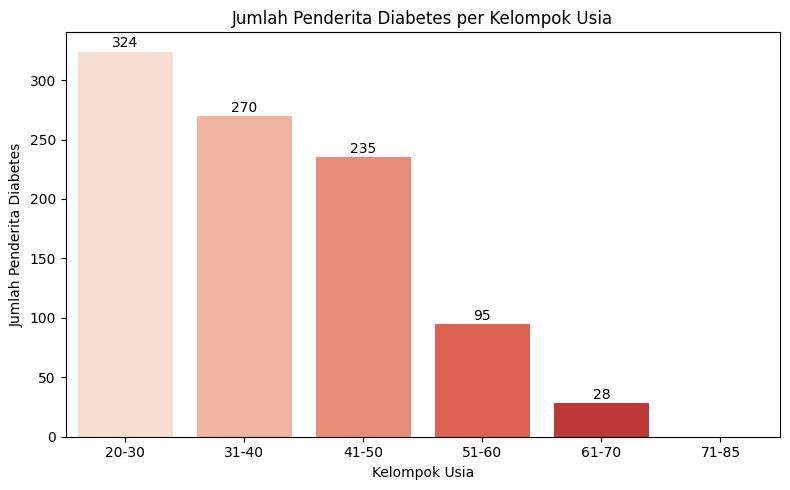

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat kembali kategori Usia
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-85']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Hitung jumlah penderita diabetes per kelompok Usia
diabetes_by_age = df[df['Outcome'] == 1].groupby('AgeGroup', observed=True)['Outcome'].count().reset_index()
diabetes_by_age.rename(columns={'Outcome': 'JumlahPenderita'}, inplace=True)

# Visualisasikan
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=diabetes_by_age, x='AgeGroup', y='JumlahPenderita', palette='Reds')
plt.title('Jumlah Penderita Diabetes per Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Penderita Diabetes')

# Tambahkan label angka di atas bar
for i, value in enumerate(diabetes_by_age['JumlahPenderita']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Hapus kembali kolom AgeGroup jika tidak dibutuhkan
df.drop(columns='AgeGroup', inplace=True)


Jika dilihat langsung dari visualisasi diatas, usia 20 hingga 30 memiliki penderita diabetes yang sangat banyak. Namun jika melihat dari visualisasi Distribusi Jumlah Orang perKelompok Usia, kelompok usia 20 - 30 memiliki jumlah yang sangat banyak dibandingkan dengan kelompok usia lainnya. Kelompok usia 20-30 hanya sekitar -+ 17% penderita diabetes. Dibandingkan dengan kelompok usia 41-50, tingkat penderita diabetes mencapai hampir 55%

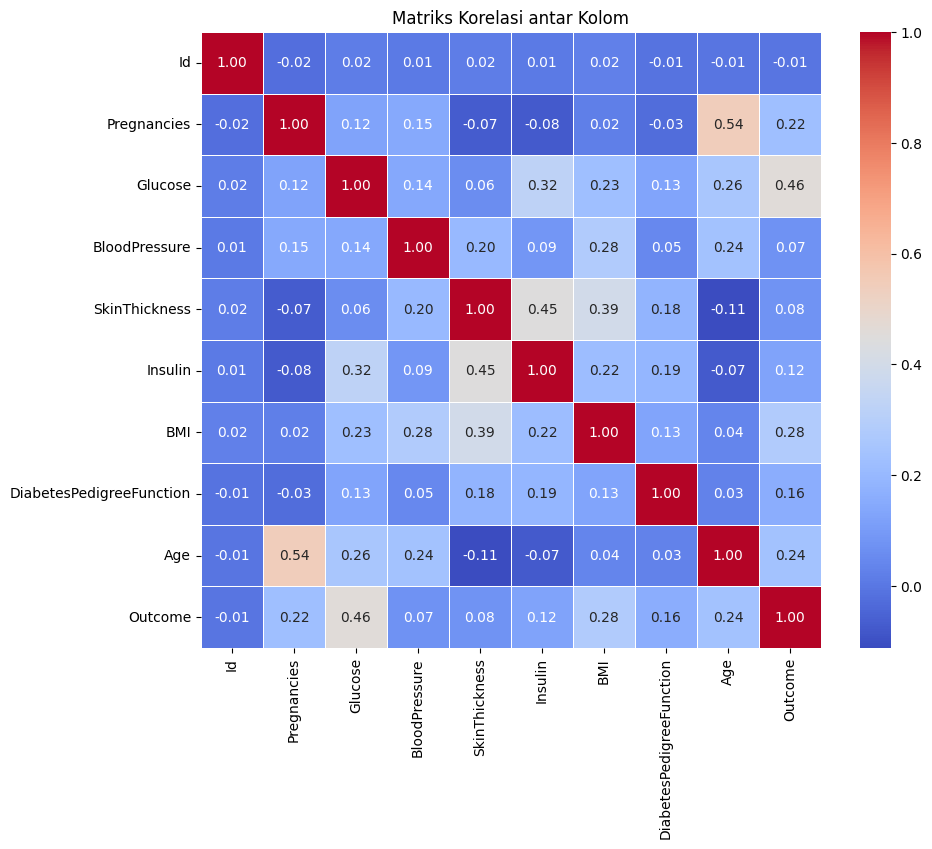

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi antar kolom
correlation_matrix = df.corr(numeric_only=True)

# Visualisasikan dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi antar Kolom')
plt.show()


- Glucose adalah fitur paling signifikan dalam menentukan kemungkinan diabetes.
- BMI, Age, dan jumlah kehamilan (Pregnancies) juga berkontribusi tetapi tidak sekuat Glucose.

## Checking Outliers

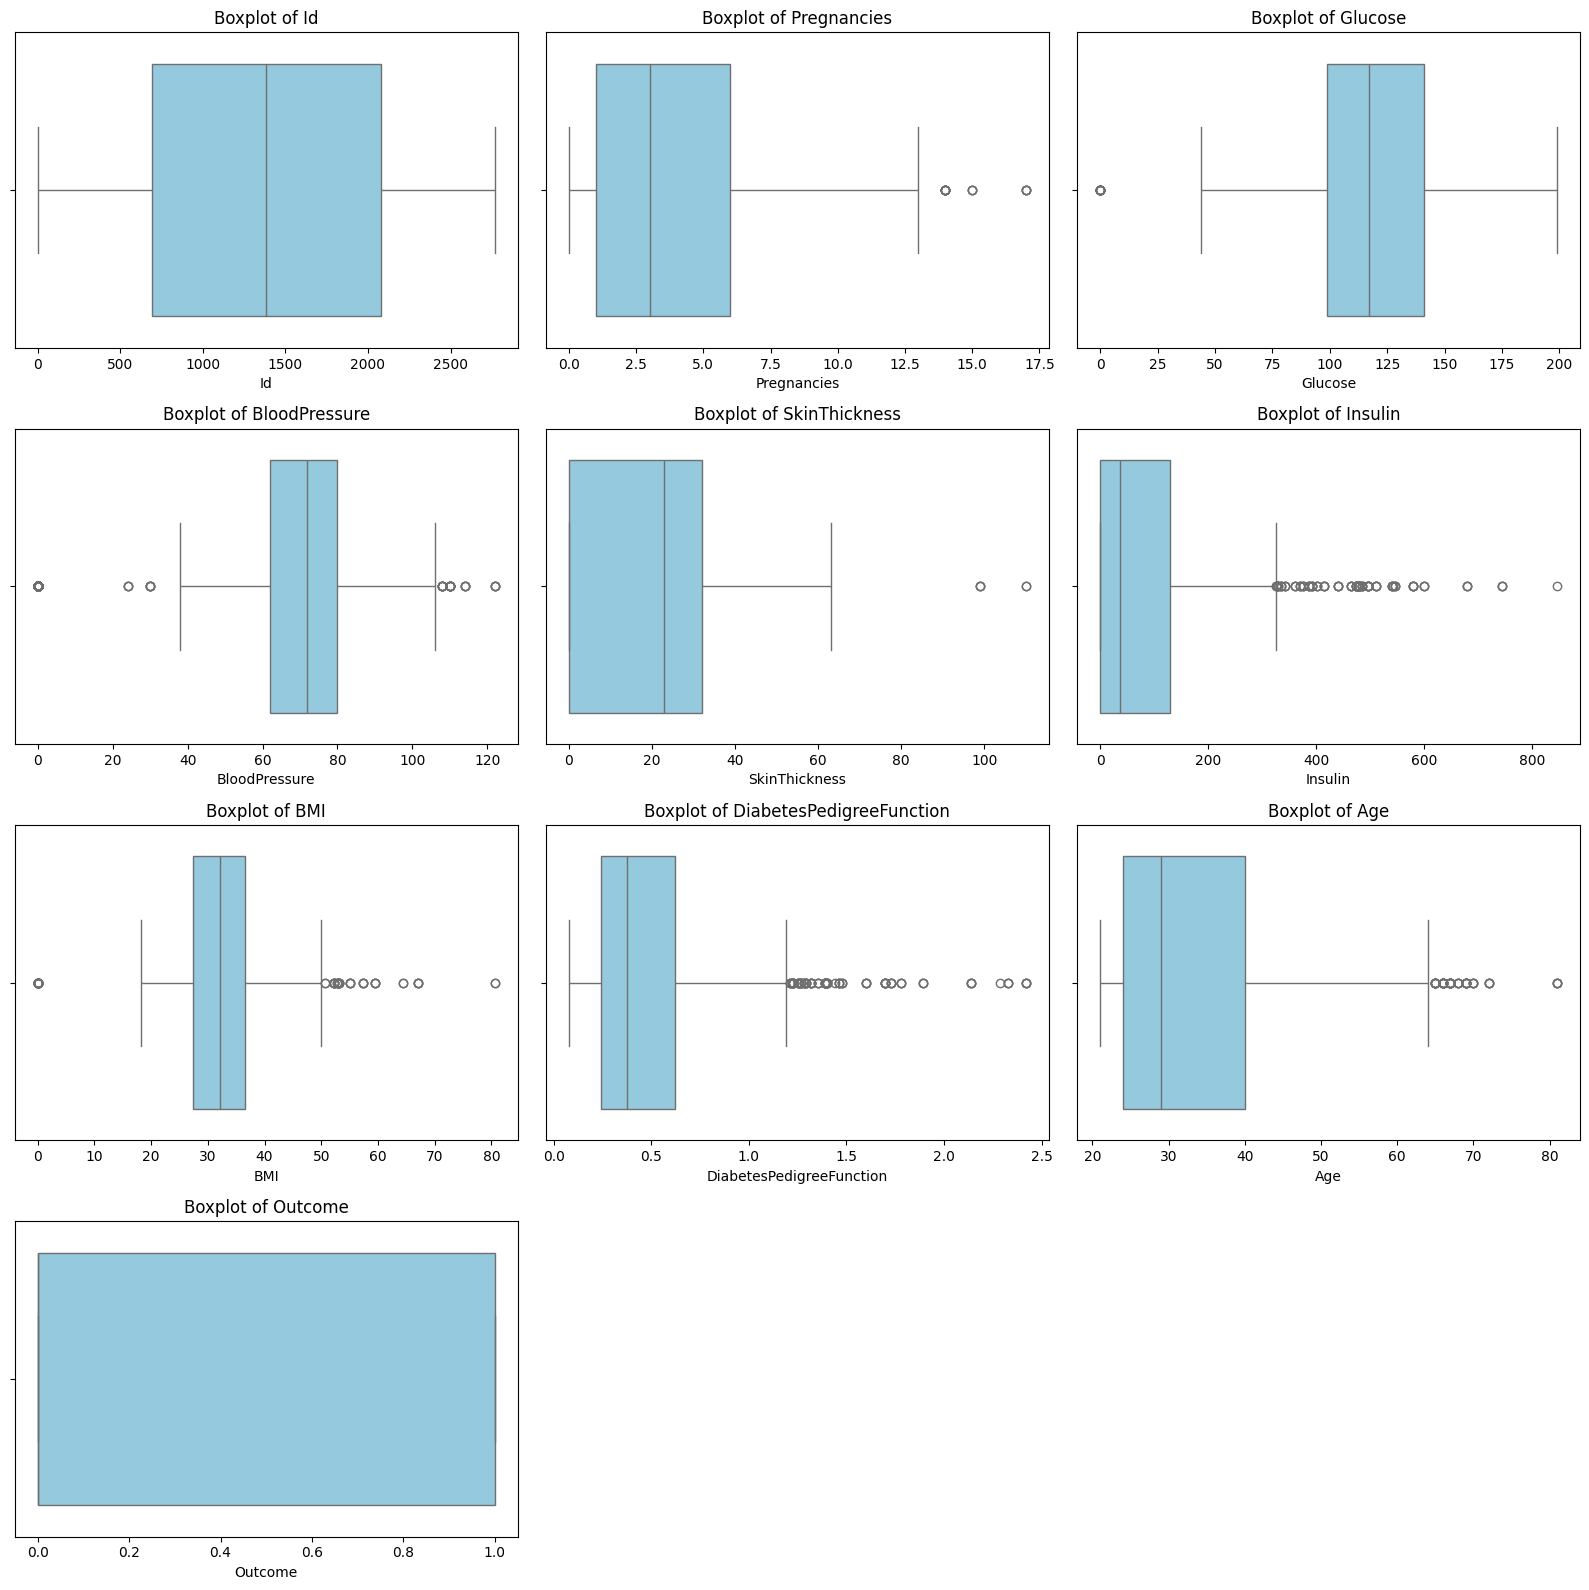

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 4 * ((len(num_cols) + 2) // 3)))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Pada kolom Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, dan DiabetesPedigreeFunction terdeteksi cukup banyak outlier. Sementara itu, kolom Age juga menunjukkan indikasi adanya outlier. Namun, setelah ditinjau lebih lanjut, nilai-nilai pada kolom Age masih berada dalam rentang yang wajar sehingga tidak dihapus dari data.

# D. Data Cleaning

## Drop Kolom

In [22]:
df.drop(["Id"],axis=1,inplace=True)

Karena kolom Id tidak digunakan dalam proses modeling, sehingga perlu dihapus

## Handling Outliers

In [23]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]

    return ls

In [24]:
index_list = []
num = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
for feature in num:
    index_list.extend(outliers(df,feature))

In [25]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [26]:
df = remove(df,index_list)

In [27]:
df.shape

(2351, 9)

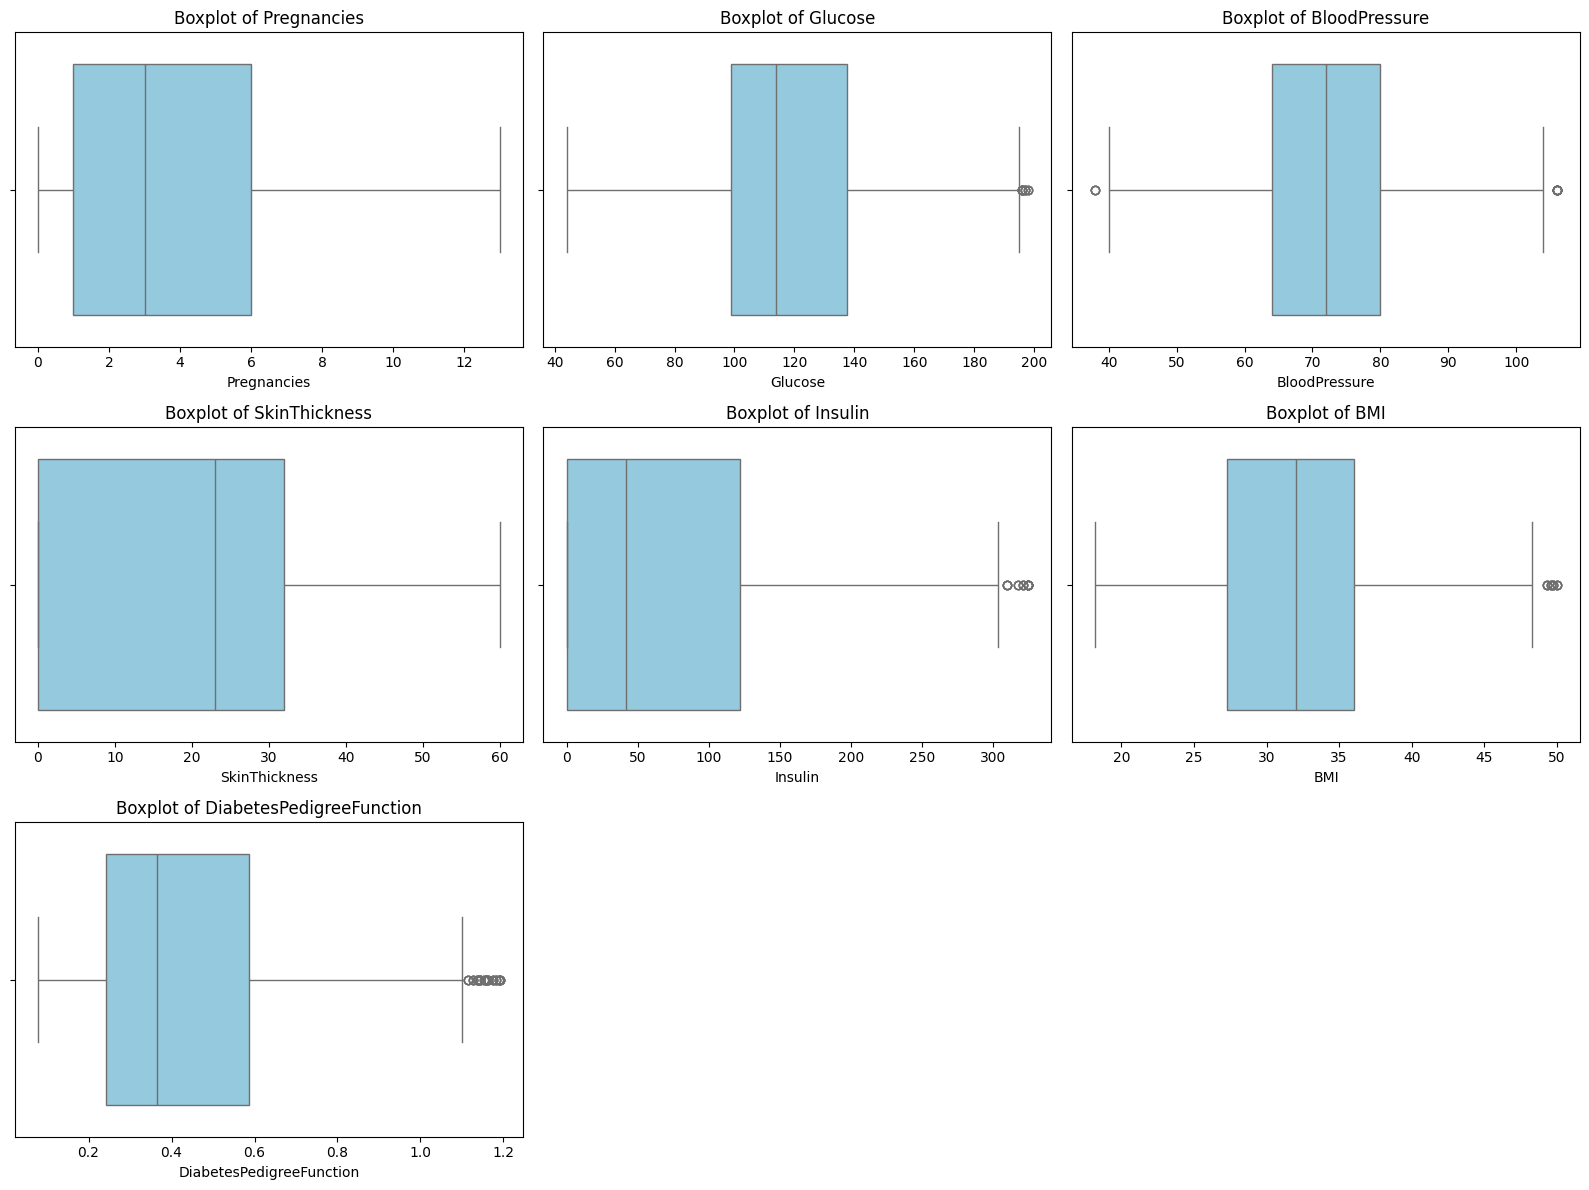

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

num = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(num):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


Visualiasi diatas menampilkan hasil setelah outliers dihapus

# Data Preparation

## **Split Data**

In [29]:
x = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify = y)

## **Modeling**

### **Logistic Regression**

In [45]:
lr_model = LogisticRegression(
    solver='lbfgs',      # Solver default yang cocok untuk dataset kecil hingga sedang
    max_iter=500,        # Jumlah iterasi maksimum, pastikan cukup agar konvergen
    random_state=42
)
lr_model.fit(x_train,y_train)

LogisticRegression(max_iter=500, random_state=42)

In [46]:
# Evaluasi model
train_acc = lr_model.score(x_train, y_train)
test_acc = lr_model.score(x_test, y_test)

print("Akurasi Training:", train_acc)
print("Akurasi Testing :", test_acc)

Akurasi Training: 0.7918321043675554
Akurasi Testing : 0.782312925170068


### **Decision Tree**

In [43]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=5,          # membatasi kedalaman pohon agar tidak overfitting
    criterion='gini',     # bisa juga 'entropy'
    random_state=42
)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [44]:
# Evaluasi
y_pred_dt = dt_model.predict(x_test)
print("Akurasi Training:", dt_model.score(x_train, y_train))
print("Akurasi Testing :", dt_model.score(x_test, y_test))

Akurasi Training: 0.8650028360748724
Akurasi Testing : 0.8452380952380952


### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [54]:
y_pred_rf = rf_model.predict(x_test)
print("Akurasi Training:", rf_model.score(x_train, y_train))
print("Akurasi Testing :", rf_model.score(x_test, y_test))

Akurasi Training: 1.0
Akurasi Testing : 0.9914965986394558


# Evaluation

In [59]:
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=12, random_state=42, n_jobs=-1)
}

# Evaluasi model
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    acc = accuracy_score(y_test, y_pred)

    # Ambil hanya kelas '1' (positif/diabetes) dan average-nya
    results[name] = {
        "Accuracy": acc,
        "Precision (1)": report['1']['precision'],
        "Recall (1)": report['1']['recall'],
        "F1-Score (1)": report['1']['f1-score'],
        "Support (1)": report['1']['support'],
        "Precision (avg)": report['weighted avg']['precision'],
        "Recall (avg)": report['weighted avg']['recall'],
        "F1-Score (avg)": report['weighted avg']['f1-score']
    }

# Set agar semua kolom ditampilkan
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Tampilkan hasil dalam DataFrame
results_df = pd.DataFrame(results).T
print(results_df.round(3))


                     Accuracy  Precision (1)  Recall (1)  F1-Score (1)  Support (1)  Precision (avg)  Recall (avg)  F1-Score (avg)
Logistic Regression     0.782          0.704       0.519         0.597        183.0            0.774         0.782           0.772
Decision Tree           0.845          0.833       0.628         0.717        183.0            0.844         0.845           0.838
Random Forest           0.991          1.000       0.973         0.986        183.0            0.992         0.991           0.991


Dari hasil classification report, Randon Forest mendapatkan akurasi yang lebih tinggi dibandingkan dengan model lainnya. Sedangkan model terendah adalah logistic Regression

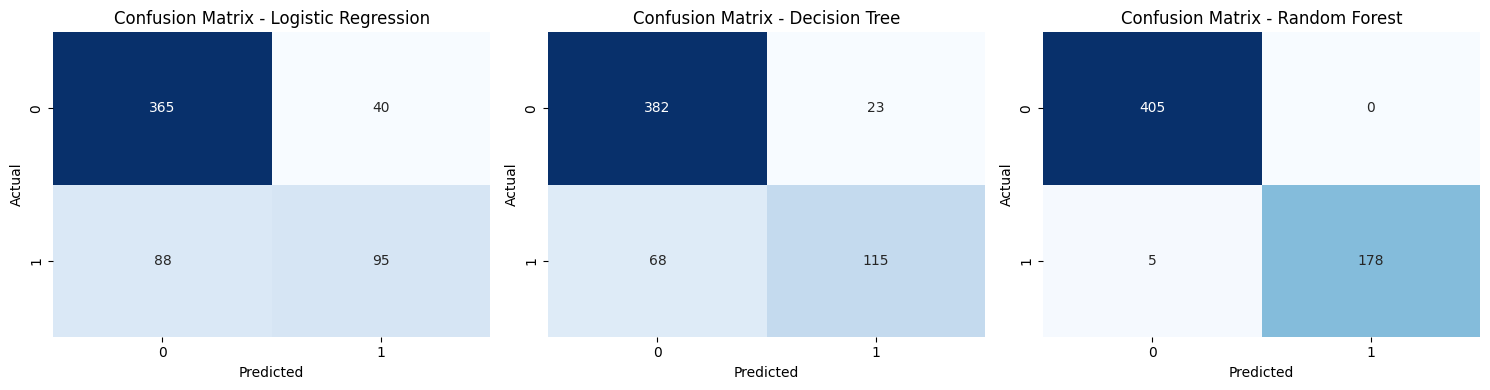

In [58]:
from sklearn.metrics import confusion_matrix

# Ukuran plotting
plt.figure(figsize=(15, 4))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

Berdasarkan hasil Confusion Matrix dari ketiga model yang diuji, model Random Forest menunjukkan performa terbaik, dengan hanya 5 kesalahan prediksi pada kelas positif (1), dan tidak ada kesalahan pada kelas negatif (0). Sebaliknya, model Logistic Regression memberikan hasil terburuk, dengan 40 kesalahan prediksi pada kelas negatif (0) dan 88 kesalahan pada kelas positif (1). Hal ini menunjukkan bahwa Logistic Regression kurang efektif dalam mendeteksi penderita diabetes